# Check latent distances between MNIST digits

## 1. Load a good model

In [1]:
from xai.constants import MODEL_DIR
from xai.models.simple_cnn import CNNClassifier

In [2]:
MODEL_FNAME = 'simple_cnn_50_epochs.pth'

model = CNNClassifier()
model.load(MODEL_DIR / MODEL_FNAME)

## 2. Load data
Split by digit

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from xai.data_handlers.mnist import load_mnist

In [4]:
batch_size = 1024

corpus_loader = load_mnist(subset_size=8192, train=True, batch_size=batch_size) # MNIST train loader
test_loader = load_mnist(subset_size=1024, train=False, batch_size=batch_size) # MNIST test loader
corpus_inputs, corpus_labels = next(iter(corpus_loader)) # A tensor of corpus inputs
test_inputs, test_labels = next(iter(test_loader)) # A set of inputs to explain

In [5]:
test_inputs.shape

torch.Size([1024, 1, 28, 28])

In [6]:
pd.DataFrame(test_labels).value_counts().sort_index()

0    107
1    106
2    117
3     90
4     88
5    103
6     88
7    114
8     95
9    116
Name: count, dtype: int64

Similar numbers of each

In [7]:
digit_range = list(range(10))
digit_range

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
# Keys are digits 0 to 9, values are boolean masks where the label is that digit
training_mask_by_digit = {digit: corpus_labels == digit for digit in digit_range}
test_mask_by_digit = {digit: test_labels == digit for digit in digit_range}
training_mask_by_digit

{0: tensor([False, False, False,  ...,  True, False, False]),
 1: tensor([False, False, False,  ..., False,  True, False]),
 2: tensor([False,  True, False,  ..., False, False, False]),
 3: tensor([False, False,  True,  ..., False, False, False]),
 4: tensor([False, False, False,  ..., False, False, False]),
 5: tensor([False, False, False,  ..., False, False, False]),
 6: tensor([False, False, False,  ..., False, False, False]),
 7: tensor([False, False, False,  ..., False, False, False]),
 8: tensor([ True, False, False,  ..., False, False,  True]),
 9: tensor([False, False, False,  ..., False, False, False])}

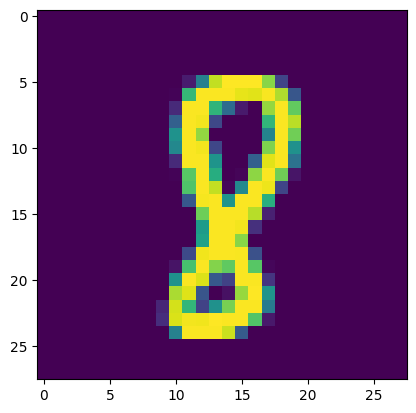

In [9]:
plt.imshow(corpus_inputs[0][0])

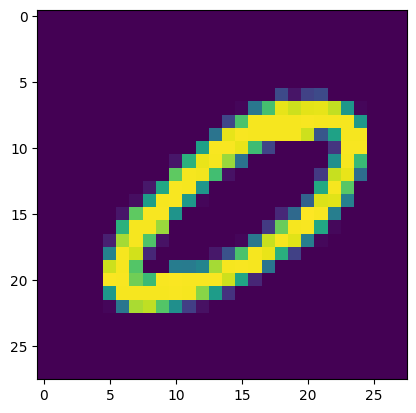

In [10]:
plt.imshow(corpus_inputs[training_mask_by_digit[0]][0][0])

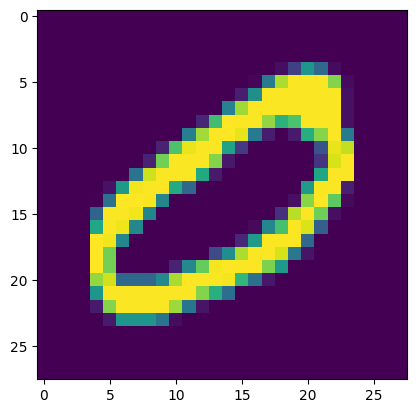

In [11]:
plt.imshow(corpus_inputs[training_mask_by_digit[0]][20][0])

In [12]:
training_input_features_by_digit = {digit: corpus_inputs[training_mask_by_digit[digit]] for digit in digit_range}
test_input_features_by_digit = {digit: test_inputs[test_mask_by_digit[digit]] for digit in digit_range}
training_input_features_by_digit

{0: tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
    

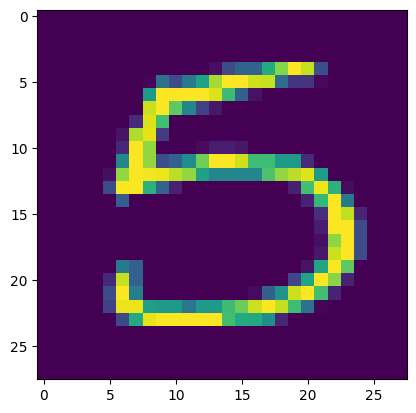

In [13]:
digit = 5
num_pic = 7
plt.imshow(training_input_features_by_digit[digit][num_pic][0])

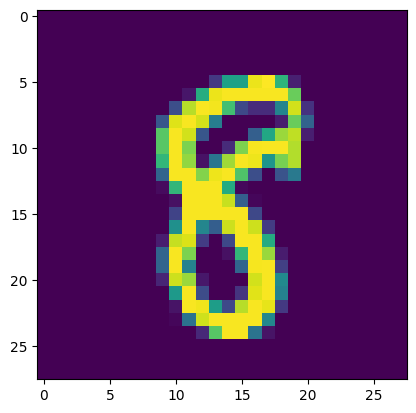

In [14]:
digit = 8
num_pic = 9
plt.imshow(test_input_features_by_digit[digit][num_pic][0])

## 3. Latent representations per digit

In [15]:
import torch

In [16]:
with torch.no_grad():
    training_latents_by_digit = {digit: model.latent_representation(training_input_features_by_digit[digit]) for digit in digit_range}
    test_latents_by_digit = {digit: model.latent_representation(test_input_features_by_digit[digit]) for digit in digit_range}
training_latents_by_digit

{0: tensor([[ 0.0000,  0.0000, 10.0457,  ...,  0.0000, 10.0492,  0.0000],
         [ 0.5352,  0.0000,  0.0000,  ...,  0.0000,  7.8545,  1.1442],
         [ 3.4890,  0.0000,  3.0901,  ...,  0.0000, 11.3265,  0.0000],
         ...,
         [ 0.0000,  0.0000, 17.3664,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  7.7102,  0.0000],
         [ 0.0000,  0.0000,  8.6024,  ...,  0.0000,  0.0000,  0.0000]]),
 1: tensor([[ 0.9249,  0.0000,  2.9165,  ...,  0.0000, 13.2081,  0.0000],
         [ 1.4564,  0.0000,  1.5974,  ...,  7.8245,  8.2568,  2.8147],
         [ 0.0000,  0.0000,  0.0000,  ...,  5.3364,  4.2603,  0.0000],
         ...,
         [ 0.2664,  0.0000,  1.6000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.2740,  0.0000,  0.0000,  ...,  4.9266,  5.1256,  0.0000],
         [ 2.2952,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  6.8420]]),
 2: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  2.1580,

## 4. Calculate pairwise distances between digits

Is the measure symmetric? No, and it's not deterministic either.

In [17]:
from xai.evaluation_metrics.distance.simplex_distance import SimplexDistance

Pairwise distance measures

In [ ]:
results_dict = {k: {} for k in digit_range}
for k in digit_range:
    results_dict[k] = {k: np.nan for k in digit_range}

for source_digit in digit_range:
    for target_digit in digit_range:
        print(f"Running {source_digit}, {target_digit}")
        # Fit a simplex explainer
        sd = SimplexDistance(model,
                             training_input_features_by_digit[source_digit],
                             test_input_features_by_digit[target_digit])
        results_dict[source_digit][target_digit] = sd.distance()


Running 0, 0
Weight Fitting Epoch: 2000/10000 ; Error: 3.22e+04 ; Regulator: 70.4 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 2.47e+04 ; Regulator: 29.7 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 2.37e+04 ; Regulator: 19.3 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 2.34e+04 ; Regulator: 16.6 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 2.33e+04 ; Regulator: 15.9 ; Reg Factor: 0
Running 0, 1
Weight Fitting Epoch: 2000/10000 ; Error: 5.68e+04 ; Regulator: 75.8 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 4.71e+04 ; Regulator: 25.4 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 4.6e+04 ; Regulator: 11.8 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 4.57e+04 ; Regulator: 8.06 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 4.56e+04 ; Regulator: 7.02 ; Reg Factor: 0
Running 0, 2
Weight Fitting Epoch: 2000/10000 ; Error: 1.05e+05 ; Regulator: 76.4 ; Reg Factor: 0
Weight Fitting Epoch: 400

In [ ]:
with open('pairwise_digit_distances_source_vs_test.pkl', 'wb') as handle:
    pickle.dump(results_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
results_df = pd.DataFrame(results_dict)
results_df

In [ ]:
plt.imshow(results_df, cmap='gray')

In [ ]:
results_df.clip(0.02, 0.04)

In [ ]:
plt.imshow(results_df.clip(0.02, 0.04), cmap='gray')

Targets are on y-axis, source on x-axis

## 5. How does this compare to pairwise (mis)classifications
Use the same model to predict classifications. Do the results look similar?
Do the latents show any potential misclassifications that haven't occurred in the test data yet but we should be wary of
if running this model in practice?

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
with torch.no_grad():
    output_probs = model.probabilities(test_inputs)
output_probs

In [ ]:
predicted_classes = torch.argmax(output_probs, dim=1)
predicted_classes

Accuracy measures

In [ ]:
accuracy_score(test_labels, predicted_classes)

Accuracy by class

In [ ]:
accuracy_by_digit = {
    digit: accuracy_score(test_labels[test_labels==digit], predicted_classes[test_labels==digit]) 
    for digit in digit_range
}
accuracy_by_digit

AUC

In [ ]:
roc_auc_score(test_labels, output_probs.detach(), multi_class='ovr')

In [ ]:
roc_auc_score(test_labels, output_probs.detach(), multi_class='ovo')

Pairwise plot of misclassifications

In [ ]:
accuracy_dict = {k: {} for k in digit_range}
for k in digit_range:
    accuracy_dict[k] = {k: np.nan for k in digit_range}

for true_digit in digit_range:
    mask = test_labels==true_digit
    predictions_for_digit = predicted_classes[mask]
    digit_count_total = float(torch.sum(mask))
    for predicted_digit in digit_range:
        digit_count_pred = float(torch.sum(predictions_for_digit == predicted_digit))
        accuracy_dict[true_digit][predicted_digit] = digit_count_pred / digit_count_total
        


In [ ]:
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df

In [ ]:
with open('pairwise_digit_distances_source_vs_test.pkl', 'wb') as handle:
    pickle.dump(results_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

Plots to compare accuracy and distances

In [121]:
# Smallest value on diagonal
min_true_pct = np.min(np.diag(accuracy_df))
min_true_pct

0.8559322033898306

In [123]:
max_false_pct = np.max(accuracy_df[accuracy_df < min_true_pct])
max_false_pct

0.045871559633027525

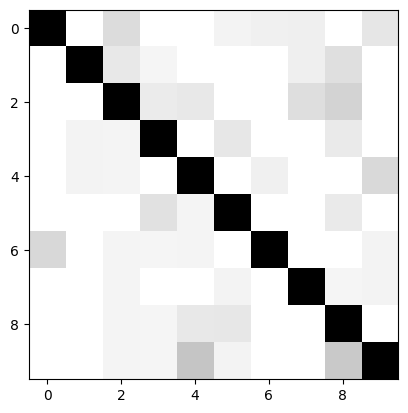

In [130]:
plt.imshow(accuracy_df.clip(0., 0.2), cmap='gray_r', )

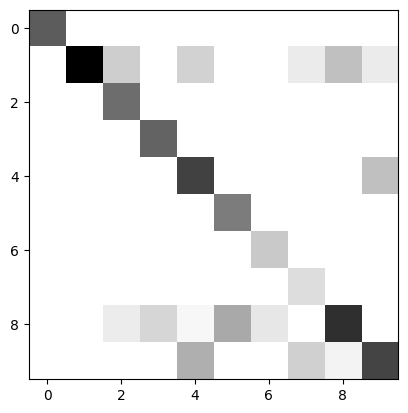

In [47]:
plt.imshow(results_df.clip(0.02, 0.04), cmap='gray')

In [131]:
accuracy_by_digit

{0: 0.9690721649484536,
 1: 0.9803921568627451,
 2: 0.8990825688073395,
 3: 0.9296875,
 4: 0.8990825688073395,
 5: 0.9320388349514563,
 6: 0.9753086419753086,
 7: 0.9473684210526315,
 8: 0.8559322033898306,
 9: 0.9306930693069307}

The accuracy is so high that the misclassifications are not meaningful as there are so few.

But the distances use the entire test set.

# Scratch

In [19]:
sd1 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[1])

In [20]:
sd1.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 5.51e+04 ; Regulator: 69.3 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 4.9e+04 ; Regulator: 25.2 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 4.81e+04 ; Regulator: 13.7 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 4.79e+04 ; Regulator: 11 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 4.78e+04 ; Regulator: 10.3 ; Reg Factor: 0


/tmp/ipykernel_647024/1845556788.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  sd1.distance()


0.04286562152937347

In [158]:
sd2 = SimplexDistance(model, input_features_by_digit[1], input_features_by_digit[0])

In [159]:
sd2.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 9.75e+04 ; Regulator: 76.8 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 9.09e+04 ; Regulator: 29.8 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 8.99e+04 ; Regulator: 15.3 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 8.97e+04 ; Regulator: 11.7 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 8.97e+04 ; Regulator: 10.6 ; Reg Factor: 0


299.4393310546875

In [160]:
sd3 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[1], simplex=sd1.simplex)
sd3.distance()

260.53839111328125

In [161]:
sd4 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[0])
sd4.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 3.41e+04 ; Regulator: 70.3 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 2.6e+04 ; Regulator: 30.7 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 2.48e+04 ; Regulator: 20.7 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 2.45e+04 ; Regulator: 18.1 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 2.44e+04 ; Regulator: 17.4 ; Reg Factor: 0


156.2950439453125

In [162]:
sd5 = SimplexDistance(model, input_features_by_digit[0], input_features_by_digit[8])
sd5.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 6.2e+04 ; Regulator: 67.8 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 5.6e+04 ; Regulator: 28.7 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 5.52e+04 ; Regulator: 17.6 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 5.49e+04 ; Regulator: 15 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 5.49e+04 ; Regulator: 14.4 ; Reg Factor: 0


234.23135375976562

In [163]:
sd6 = SimplexDistance(model, input_features_by_digit[1], input_features_by_digit[1])
sd6.distance()

Weight Fitting Epoch: 2000/10000 ; Error: 2.14e+04 ; Regulator: 84.2 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 1.62e+04 ; Regulator: 39.3 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 1.55e+04 ; Regulator: 27.9 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 1.53e+04 ; Regulator: 25.1 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 1.53e+04 ; Regulator: 24.4 ; Reg Factor: 0


123.58036804199219

Can we scale the distance measure better?

In [118]:
self = sd1

In [119]:
target_latents_approx = self.simplex.latent_approx()

In [121]:
target_latents_approx.shape

torch.Size([122, 50])

In [123]:
self.target_latents.shape

torch.Size([122, 50])

In [124]:
self._distance_per_point = self.target_latents - target_latents_approx

In [132]:
self._distance_per_point.shape

torch.Size([122, 50])

6100

In [129]:
residual = torch.sqrt(torch.sum(self._distance_per_point ** 2)) 
residual

tensor(246.6844)

In [137]:
self.target_latents.shape[0]

122

In [139]:
torch.norm(self._distance_per_point)

tensor(246.6844)

In [141]:
torch.norm(self._distance_per_point, p=2)

tensor(246.6844)

In [144]:
float(residual / (122 * 50))


0.04044007137417793

In [164]:
self = sd1
self.distance() / (np.product(self._distance_per_point.shape))

0.04066192626953125

In [165]:
self = sd2
self.distance() / (np.product(self._distance_per_point.shape))

0.05649798699145047

In [166]:
self = sd3
self.distance() / (np.product(self._distance_per_point.shape))

0.04271121165791496

In [167]:
self = sd4
self.distance() / (np.product(self._distance_per_point.shape))

0.02948963093307783

In [168]:
self = sd5
self.distance() / (np.product(self._distance_per_point.shape))

0.048295124486549615

In [169]:
self = sd6
self.distance() / (np.product(self._distance_per_point.shape))

0.020259076728195442